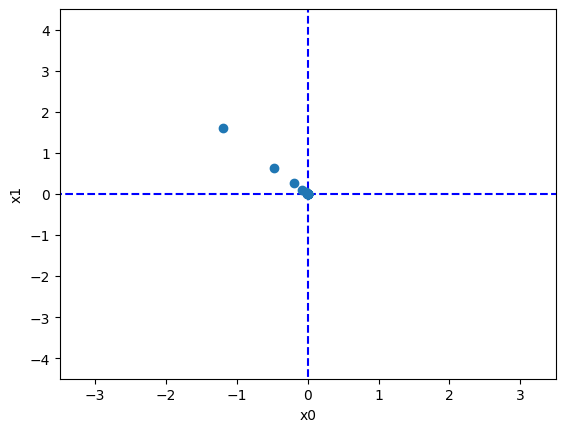

In [ ]:
# coding: utf-8
import os, sys
import numpy as np
import matplotlib.pyplot as plt

def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # step size
    grad = np.zeros_like(x)  # initialize gradient

    for idx in range(x.size):
        tmp_val = x[idx]  # store original value

        x[idx] = float(tmp_val) + h  # increment by h
        fxh1 = f(x)  # evaluate f at x + h

        x[idx] = tmp_val - h  # decrement by h
        fxh2 = f(x)  # evaluate f at x - h

        grad[idx] = (fxh1 - fxh2) / (2 * h)  # compute the gradient
        x[idx] = tmp_val  # restore original value

    return grad


def numerical_gradient(f, x):
    if x.ndim == 1:
        return _numerical_gradient_no_batch(f, x)
    else:
        grad = np.zeros_like(x)  # initialize gradient for multi-dimensional case
        for idx, x_i in enumerate(x):
            grad[idx] = _numerical_gradient_no_batch(f, x_i)

        return grad


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        grad = numerical_gradient(f, x)  # compute gradient
        x -= lr * grad  # update x

        x_history.append(x.copy())  # store history

    return x, np.array(x_history)


def function_2(x):
    return x[0] ** 2 + x[1] ** 2  # simple quadratic function


init_x = np.array([-3.0, 4.0])  # initial point

lr = 0.3  # learning rate
step_num = 20  # number of steps
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot([-5, 5], [0, 0], "--b")
plt.plot([0, 0], [-5, 5], "--b")
plt.plot(x_history[:, 0], x_history[:, 1], "o")

plt.xlim(-3.5, 3.5)
plt.ylim((-4.5, 4.5))
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()